In [22]:
import math

import numpy as np
import matplotlib.pyplot as plt

L'hypothèse générale du filtre de Kalman est que :

* le système peut être décrit par des combinaisons d'équations linéaires, et ces équations sont connues
* les variables du systèmes peuvent être décrites par leur moyenne $\mu$ et l'amplitude de leur incertitude $\sigma$

Le filtrage se fera ensuite en deux étapes :

1. **Prédiction**: connaissant l'état actuel (valeurs et incertitudes) et la valeur des commandes, la connaissance des équations du système permet de calculer un nouveal état estimé.
2. **Mise à jour**: de cet état estimé, on peut calculer les valeurs qu'auraient dû donner les senseurs, les comparer aux valeurs réellement obtenues et en tirer une correction.

Prenons l'exemple d'un petit mobile à roulettes, équipé de deux roues, et se déplaçant en ligne droite.

Le mobile est totalement défini par son vecteur d'état, et récciproquement, le vecteur d'état contient toutes les informations nécessaire à la description du système. Ce sont ces paramètres qui vont être filtrés.

$$
\vec{x} = \begin{bmatrix} p \\ v \end{bmatrix}
$$

Avec $p$ la position et $v$ la vitesse, suivant le seul axe de liberté du mobile.

En fait, l'état réel n'est jamais vraiment connu, mais le filtre va nous permettre de maintenir  une meilleure estimée de l'état à l'instant $k$.

$$
\hat{\mathbf{x}}_k = \begin{bmatrix} p \\ v \end{bmatrix} _ k
$$

* $\hat{\mathbf{x}}_k$, la meilleure estimée de l'état à l'instant $k$
* $p$, la position moyenne estimée
* $v$, la vitesse moyenne estimée

Mais également une information sur l'incertitude de cet état, via la matrice de covariances. Puisque nous avons, au lieu d'un scalaire $\mu$ représentant la moyenne, un vecteur d'état $\hat{x}$ à $n$ éléments, l'incertitude est une matrice $n \times n$. Les $\Sigma$ de la diagonale definissent une incertitude associée à chaque éléments du vecteur et, le reste, représente les incertitudes corrélées.

$$
\mathbf{P}_k = 
\begin{bmatrix}
    \Sigma_{pp} & \Sigma_{pv} \\
    \Sigma_{vp} & \Sigma_{vv}
\end{bmatrix}
$$

* $\Sigma_{pp}$, l'incertitude sur la position
* $\Sigma_{vv}$, l'incertitude sur la vitesse
* $\Sigma_{pv}$ la corrélation d'incertitude entre la position est la vitesse. $\Sigma_{pv} = \Sigma_{vp}$, la matrice est symétrique

Il nous faut maintenant écrire les relations (issues des lois de la physique et estimées a priori d'après la connaissance du système) qui vont décrire le passage de $T_n$ à $T_{n+1}$.

Dans le cas du mobile, il est possible de mettre en équation la position et la vitesse courante, par rapport à la position et la vitesse précédente.

$$
\begin{split}
p_k &= p_{k-1} + T &v_{k-1} \\
v_k &= &v_{k-1}
\end{split}
$$

ou, sous forme matricielle

$$
\hat{\mathbf{x}}_k = \begin{bmatrix}
    1 & T \\
    0 & 1
\end{bmatrix} \hat{\mathbf{x}}_{k-1}
$$

Soit

$$
\hat{\mathbf{x}}_k = \mathbf{F}_k \hat{\mathbf{x}}_{k-1}
$$

Avec $\mathbf{F}_k$ la matrice de prédiction

Si la covariance de $\mathbf{x}$ est représentée par la matrice $\mathbf{P}$ :

$$
Cov(\mathbf{x}) = \mathbf{P}
$$
    
Alors,

$$
Cov(\mathbf{A} \mathbf{x}) = \mathbf{A} \mathbf{P} \mathbf{A}^\mathsf{T}
$$
    
On peut donc ré-écrire nos estimations d'état et de covariance courantes en fonctions des estimations précédentes.

$$
\begin{split}
\hat{\mathbf{x}}_k &= \mathbf{F}_k \hat{\mathbf{x}}_{k-1} \\
\mathbf{P}_k &= \mathbf{F}_k \mathbf{P}_{k-1} \mathbf{F}_k^\mathsf{T}
\end{split}
$$

Mais il nous reste une connaissance du système à exploiter : la commande. Si elle peut-être connue, on peut alors ajouter les équation physiques correspondantes. Disons que le module est commandé par une accération connue $ a $

$$ \begin{split} 
\color{deeppink}{p_k} &= \color{royalblue}{p_{k-1}} + T &\color{royalblue}{v_{k-1}} + \frac{1}{2} & T^2 & \color{darkorange}{a_{k-1}} \\ 
\color{deeppink}{v_k} &= &\color{royalblue}{v_{k-1}} + & T & \color{darkorange}{a_{k-1}}
\end{split} $$

Ce qui peut se mettre sous forme de matrice :

$$
\color{deeppink}{\mathbf{\hat{x}}_k} = \mathbf{F}_k \color{royalblue}{\mathbf{\hat{x}}_{k-1}} + \begin{bmatrix} 
\frac{1}{2}T^2 \\ 
T
\end{bmatrix} \begin{bmatrix} \color{darkorange}{a_{k-1}} \end{bmatrix} 
$$

Soit

$$
\color{deeppink}{\mathbf{\hat{x}}_k} = \mathbf{F}_k \color{royalblue}{\mathbf{\hat{x}}_{k-1}} + \mathbf{B}_k \color{darkorange}{\mathbf{u}_k}
$$

avec $ \mathbf{B}_k = \begin{bmatrix} \frac{1}{2}T^2 \\ T \end{bmatrix} $ la matrice de commande et $ \vec{u_k} $ le vecteur-ligne de commande.

On peut également prendre en compte des perturbations inconnues $ \mathbf{Q} $ qui contribuent à la mise à jour de la matrice de covariance $ \mathbf{P} $. L'équation totale devient donc :

$$ \begin{equation} 
\begin{split} 
\color{deeppink}{\hat{\mathbf{x}}_k} &= \mathbf{F}_k \color{royalblue}{\hat{\mathbf{x}}_{k-1}} + \mathbf{B}_k \color{darkorange}{\mathbf{u}_k} \\ 
\color{deeppink}{\mathbf{P}_k} &= \mathbf{F_k} \color{royalblue}{\mathbf{P}_{k-1}} \mathbf{F}_k^T + \color{mediumaquamarine}{\mathbf{Q}_k} 
\end{split}
\end{equation} $$



Il ne reste plus qu'à tenir compte de l'incertitude sur la mesure :
$$ \begin{split} 
\vec{z_k} &= \mathbf{H}_k \color{deeppink}{\mathbf{\hat{x}}_k} \\ 
\mathbf{Z_k} &= \mathbf{H}_k \color{deeppink}{\mathbf{P}_k} \mathbf{H}_k^T 
\end{split} $$

* $\mathbf{H}_k$, la matrice de projection des états sur les mesures
* $\vec{z_k}$, la valeur moyenne attendue sur les senseurs
* $Z_k$, l'erreur gaussienne attendue sur les senseurs

Dans l'exemple de notre mobile, deux capteurs de vitesse sont installés sur les roues et donnent la vitesse du mobile avec une erreur faible, et un télémètre donne la position, avec une erreur plus élevée

$$
\mathbf{H}_k = 
\begin{bmatrix}
    1 & 0 \\
    0 & 1 \\
    0 & 1
\end{bmatrix}
$$


## Produit de gaussiennes

Une hypothèse de travail du filtre de Kalman est que chaque valeur peut être modélisée par une gaussienne représentant sa distribution de probabilité.

Si on défini une distribution gaussienne $\mathcal{G}(x, \mu, \sigma)$ de moyenne $\mu$ et d'écart type $\sigma$ par la fonction suivante :

$$ \begin{equation}
\mathcal{G}(x, \mu, \sigma) = \frac{1}{ \sigma \sqrt{ 2\pi } } e^{ -\frac{ (x – \mu)^2 }{ 2\sigma^2 } } 
\end{equation} $$

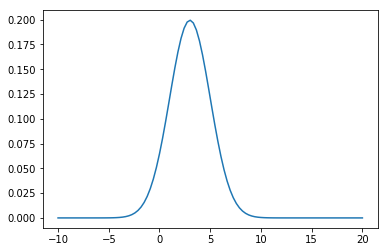

In [52]:
x = np.linspace(-10, 20, 100)

def gaussian(x, m, s) :
    return 1.0 / (s * math.sqrt(2.0 * math.pi)) * np.exp(((x - m) ** 2)/(-2.0 * (s ** 2)))

plt.plot(x, gaussian(x, 3.0, 2.0))
plt.show()

On trouve que le produit (renormalisé) de deux gaussiennes $\mathcal{G}(x, \color{deeppink}{\mu_0}, \color{deeppink}{\sigma_0})$ et $\mathcal{G}(x, \color{royalblue}{\mu_1}, \color{royalblue}{\sigma_1})$ est paramétré par :

$$ \begin{equation}
\begin{split} 
\color{purple}{\mu} &= \color{deeppink}{\mu_0} + \frac{\color{deeppink}{\sigma_0^2} (\color{royalblue}{\mu_1} – \color{deeppink}{\mu_0})} {\color{deeppink}{\sigma_0^2} + \color{royalblue}{\sigma_1^2}}\\ 
\color{purple}{\sigma}^2 &= \color{deeppink}{\sigma_0}^2 – \frac{\color{deeppink}{\sigma_0}^4} {\color{deeppink}{\sigma_0}^2 + \color{royalblue}{\sigma_1}^2} 
\end{split} 
\end{equation} $$

En posant

$$\color{darkorange}{\mathbf{k}} = \frac{\color{deeppink}{\sigma_0}^2}{\color{deeppink}{\sigma_0}^2 + \color{royalblue}{\sigma_1}^2}$$

on obtient :

$$ \begin{equation} 
\begin{split} 
\color{purple}{\mu} &= \color{deeppink}{\mu_0} + &\color{darkorange}{\mathbf{k}} (\color{royalblue}{\mu_1} - \color{deeppink}{\mu_0})\\ 
\color{purple}{\sigma}^2 &= \color{deeppink}{\sigma_0}^2 – &\color{darkorange}{\mathbf{k}} \color{deeppink}{\sigma_0}^2 
\end{split}
\end{equation} $$

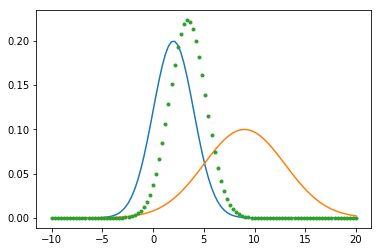

In [51]:
m0, s0 = 2.0, 2.0
m1, s1 = 9.0, 4.0

k = (s0**2) / (s0**2 + s1**2)

m = m0 + k * (m1 - m0)
s = math.sqrt(s0**2 - k * s0**2)

plt.plot(x, gaussian(x, m0, s0))
plt.plot(x, gaussian(x, m1, s1))
#plt.plot(x, gaussian(x, m0, s0) * gaussian(x, m1, s1) * ((math.sqrt(2*math.pi) * s0**2) / (s0*s1)))
plt.plot(x, gaussian(x, m, s), '.')
plt.show()

De manière similaire, sous forme matricielle, si on pose :
$$
\color{orange}{\mathbf{K}} = \color{deeppink}{\Sigma_0} (\color{deeppink}{\Sigma_0} + \color{royalblue}{\Sigma_1})^{-1} 
$$
On obtient :
$$
\begin{split} 
\color{purple}{\vec{\mu}} &= \color{deeppink}{\vec{\mu}_0} + & \color{darkorange}{\mathbf{K}} (\color{royalblue}{\vec{\mu}_1} – \color{deeppink}{\vec{\mu}_0}) \\ 
\color{purple}{\Sigma} &= \color{deeppink}{\Sigma_0} – &\color{orange}{\mathbf{K}} \color{deeppink}{\Sigma_0}
\end{split}
$$

## Prédiction

La première étape est donc de faire une estimation de l'état à $T_k$ connaissant l'état à $T_{k-1}$ et la commande. Et d'en extraire une première estimation du  vecteur d'observation, celui lui qu'on aurait du lire sur les senseurs.

$$ \begin{equation} \begin{split} 
\hat{\mathbf{x}}_k &= \mathbf{F}_k \mathbf{x}_{k-1} + \mathbf{B}_k \vec{u}_k \\ 
\mathbf{P}_k &= \mathbf{F_k} \mathbf{P}_{k-1} \mathbf{F}_k^\mathsf{T} + \mathbf{Q}_k 
\end{split} \end{equation} $$

Partant de la prédiction, il ne reste qu'à la projeter suivant la matrice d'observation pour obtenir la valeur prédite lue sur les senseurs :

$$ \begin{equation} \begin{split} 
\vec{z}_k &= \mathbf{H}_k \mathbf{\hat{x}}_k \\ 
\mathbf{Z}_k &= \mathbf{H}_k \mathbf{P}_k \mathbf{H}_k^T 
\end{split} \end{equation}$$


La deuxième, est de confronter les mesures prédites aux mesures obtenues réellement, et de trouver la combinaison de leurs gaussiennes

$$ \begin{equation} \begin{split} 
\mathbf{r}_k \\ 
\mathbf{R}_k
\end{split} \end{equation}$$

Avec $\mathbf{r}_k$ les valeurs ($\mu$) relevées sur les senseurs et $\mathbf{R}_k$ l'estimation d'erreur ($\sigma^2$) des capteurs réels. Afin d'obtenirs deux nouvelles estimations corrigées $\mathbf{y}_k$ et $\mathbf{Y}_k$.

$$ \begin{equation} \begin{split} 
\mathbf{y}_k &= \mathbf{z}_k + \mathbf{K} ( \mathbf{r}_k - \mathbf{z}_k ) \\ 
\mathbf{Y}_k &= \mathbf{Z}_k - \mathbf{K} \mathbf{Z}_k
\end{split} \end{equation}$$

Avec 

$$ \begin{equation} \begin{split} 
\mathbf{y}_k &= \mathbf{H}_k \mathbf{x}'_k \\ 
\mathbf{Y}_k &= \mathbf{H}_k \mathbf{X}'_k \mathbf{H}_k^T 
\end{split} \end{equation}$$

$\mathbf{x}'_k$ représentant les valeurs corrigées de l'état et $\mathbf{X}'_k$ les valeurs corrigées de la matrice de covariance.


